### Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 
pd.set_option('display.max_columns',500)

In [2]:
tweets_df = pd.read_csv('vaccine_tweets.csv')

In [3]:
tweets_df.head(2) 

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1386122456713228288,1386122456713228288,2021-04-25 06:28:41 India Standard Time,2021-04-25,06:28:41,530,1373531468744552448,vaxhunterscan,Vaccine Hunters Canada,NaN,We had an issue where twitter seemed to have m...,en,"[{'screen_name': 'twittercanada', 'name': 'twi...",[],[],46,127,1704,[],[],https://twitter.com/VaxHuntersCan/status/13861...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1386111987608821763,1386111987608821763,2021-04-25 05:47:05 India Standard Time,2021-04-25,05:47:05,530,166985027,naheedd,Naheed Dosani,NaN,Can someone nominate the team @VaxHuntersCan f...,en,"[{'screen_name': 'vaxhunterscan', 'name': 'vac...",[],[],10,161,1325,['covid19'],[],https://twitter.com/NaheedD/status/13861119876...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [4]:
tweets_df.shape

(24744, 36)

In [5]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24744 entries, 0 to 24743
Data columns (total 36 columns):
id                 24744 non-null int64
conversation_id    24744 non-null int64
created_at         24744 non-null object
date               24744 non-null object
time               24744 non-null object
timezone           24744 non-null int64
user_id            24744 non-null int64
username           24744 non-null object
name               24744 non-null object
place              3 non-null object
tweet              24744 non-null object
language           24744 non-null object
mentions           24744 non-null object
urls               24744 non-null object
photos             24744 non-null object
replies_count      24744 non-null int64
retweets_count     24744 non-null int64
likes_count        24744 non-null int64
hashtags           24744 non-null object
cashtags           24744 non-null object
link               24744 non-null object
retweet            24744 non-null bool
qu

In [6]:
tweets_df.nunique()

id                 24744
conversation_id    23858
created_at         24621
date                 924
time               20916
timezone               1
user_id             9871
username            9871
name                9754
place                  3
tweet              24707
language              26
mentions            1352
urls                2742
photos              3702
replies_count       2285
retweets_count      5218
likes_count        10860
hashtags            1339
cashtags               6
link               24744
retweet                1
quote_url           1913
video                  2
thumbnail           4943
near                   0
geo                    0
source                 0
user_rt_id             0
user_rt                0
retweet_id             0
reply_to             567
retweet_date           0
translate              0
trans_src              0
trans_dest             0
dtype: int64

#### Initial Observation
- Total tweets Successfully collected 24744 Tweets
- Total number of rows to be worked on 24744
- 10 columns with all null value
- 3 column with more than 80% null values


### Checking for nytimes / cnn / usnews value counts

In [7]:
df_nytimestweets = tweets_df[tweets_df['username'] == 'nytimes']
df_nytimestweets['username'].value_counts()

nytimes    83
Name: username, dtype: int64

####  most popular tweeter news account CNN Breaking News (60.2m followers) has only 47 tweets regarding Vaccine

In [8]:
df_cnntweets = tweets_df[tweets_df['username'] == 'cnnbrk']
df_cnntweets['username'].value_counts()

cnnbrk    48
Name: username, dtype: int64

In [9]:
df_usnewstweets = tweets_df[tweets_df['username'] == 'usnews']
df_usnewstweets['username'].value_counts() 

Series([], Name: username, dtype: int64)

### Dropping columns with more than 60% null value

In [10]:
tweets_df = tweets_df.loc[:, tweets_df.isnull().mean() < .6]

#### Checking for users with number of tweets

In [11]:
tweets_df['username'].value_counts()

kylegriffin1      194
spectatorindex    188
drericding        152
aslavitt          136
ani               116
                 ... 
rkj65               1
scotch_rox          1
toussaint_x         1
donaldtusk          1
thefastshow1        1
Name: username, Length: 9871, dtype: int64

#### number of languages tweets

In [12]:
tweets_df['language'].value_counts()

en     24061
tl       149
fr       128
hi        94
ja        70
in        52
und       46
pt        44
es        29
it        23
cs        12
de         6
ca         5
ht         5
ro         4
et         3
da         3
tr         2
ur         1
nl         1
mr         1
th         1
lt         1
fi         1
fa         1
ar         1
Name: language, dtype: int64

In [13]:
tweets_df['cashtags'].value_counts()

[]                                       24739
['mrna']                                     1
['pfe']                                      1
['pfe', 'mrna']                              1
['pfe', 'mrna', 'nvax', 'azn', 'jnj']        1
['zm']                                       1
Name: cashtags, dtype: int64

In [14]:
tweets_df['video'].value_counts() 

0    19720
1     5024
Name: video, dtype: int64

In [15]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24744 entries, 0 to 24743
Data columns (total 23 columns):
id                 24744 non-null int64
conversation_id    24744 non-null int64
created_at         24744 non-null object
date               24744 non-null object
time               24744 non-null object
timezone           24744 non-null int64
user_id            24744 non-null int64
username           24744 non-null object
name               24744 non-null object
tweet              24744 non-null object
language           24744 non-null object
mentions           24744 non-null object
urls               24744 non-null object
photos             24744 non-null object
replies_count      24744 non-null int64
retweets_count     24744 non-null int64
likes_count        24744 non-null int64
hashtags           24744 non-null object
cashtags           24744 non-null object
link               24744 non-null object
retweet            24744 non-null bool
video              24744 non-null int64

### Checking dates and converting it into datetime

In [16]:
tweets_df['date'].min()

'2013-02-17'

In [17]:
tweets_df['date'].max()

'2021-04-25'

In [18]:
tweets_df['date']= pd.to_datetime(tweets_df['date']) 

In [19]:
tweets_df['year'] = tweets_df['date'].dt.year
tweets_df['month'] = tweets_df['date'].dt.month

In [20]:
tweets_df['year'].value_counts() 

2021    14179
2020     9728
2019      541
2018      184
2017       69
2015       18
2016       14
2014        9
2013        2
Name: year, dtype: int64

#### Catplot for number of tweets based on month and year

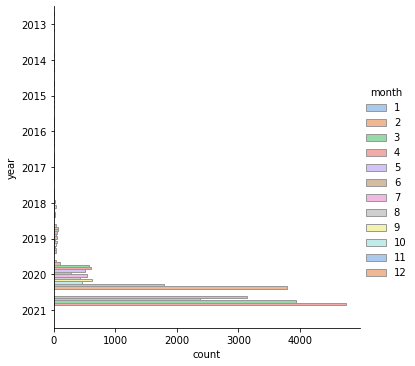

In [21]:
sns.catplot(y="year", hue="month", kind="count",
            palette="pastel", edgecolor=".6",
            data=tweets_df)

#### Observation
- Most of the tweets are from 2020 onwards so we can make the assumption , the talk of vaccine became more popular since COVID19 started

#### Selecting tweets after 1/1/2020

In [22]:
ts = pd.to_datetime('1/1/2020')
tweets_df_r = tweets_df.loc[tweets_df.date >= ts,: ] 

In [23]:
tweets_df_r.shape

(23907, 25)

In [24]:
tweets_df_r.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23907 entries, 0 to 23906
Data columns (total 25 columns):
id                 23907 non-null int64
conversation_id    23907 non-null int64
created_at         23907 non-null object
date               23907 non-null datetime64[ns]
time               23907 non-null object
timezone           23907 non-null int64
user_id            23907 non-null int64
username           23907 non-null object
name               23907 non-null object
tweet              23907 non-null object
language           23907 non-null object
mentions           23907 non-null object
urls               23907 non-null object
photos             23907 non-null object
replies_count      23907 non-null int64
retweets_count     23907 non-null int64
likes_count        23907 non-null int64
hashtags           23907 non-null object
cashtags           23907 non-null object
link               23907 non-null object
retweet            23907 non-null bool
video              23907 non-nu

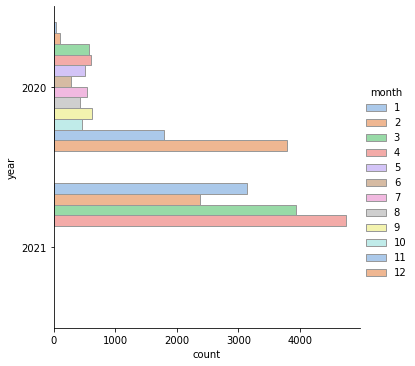

In [25]:
sns.catplot(y="year", hue="month", kind="count",
            palette="pastel", edgecolor=".6",
            data=tweets_df_r)

In [26]:
tweets_df_r.groupby(['year','month']).size().unstack(fill_value=0)

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2020,42,109,579,600,503,280,540,432,619,456,1787,3781
2021,3135,2370,3931,4743,0,0,0,0,0,0,0,0


#### Observation
- Clearly the number of tweets with regards to vaccine has been the highest in 25 days of April 2021

### Creating a subset and working on it

In [27]:
subset = ['date', 'tweet', 'month','year']
tweets_df_r1 = tweets_df_r.loc[:, subset] 
tweets_df_r1.head() 

,date,tweet,month,year
0,2021-04-25,We had an issue where twitter seemed to have m...,4,2021
1,2021-04-25,Can someone nominate the team @VaxHuntersCan f...,4,2021
2,2021-04-25,Sorry for it being late. I had to get a cool l...,4,2021
3,2021-04-25,Covid vaccines are the results of decades of r...,4,2021
4,2021-04-25,Got my first vaccine shot and man did it fuck ...,4,2021


In [28]:
tweets_df_r1.shape

(23907, 4)

### Checking the word frequency

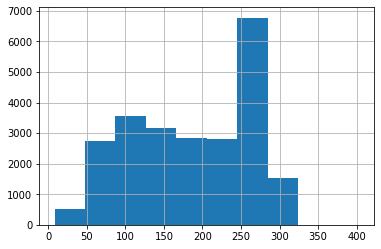

In [29]:
tweets_df_r1['tweet'].str.len().hist() 

#### Observation
- The histogram shows that the tweets range from **5 to 320 characters** and generally, it is between **50 to 250 characters.**

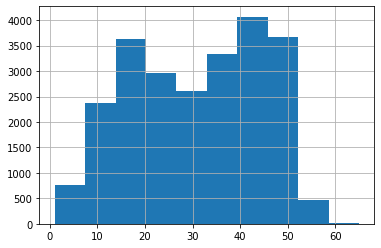

In [30]:
tweets_df_r1['tweet'].str.split().\
    map(lambda x: len(x)).\
    hist() 

#### Observation
The histogram shows that the tweets at the **number of word level** range from 1 to 58 words and generally, it is between 10 to 50 words.

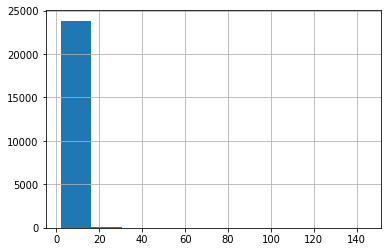

In [31]:
tweets_df_r1['tweet'].str.split().\
   apply(lambda x : [len(i) for i in x]). \
   map(lambda x: np.mean(x)).hist()

#### Observation
The histogram shows **Average number of word** us 2-18

### NLTK

In [32]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.probability import FreqDist
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

#### Adding Tokenized column

In [33]:
tweets_df_r1['tt'] = tweets_df_r1['tweet'].apply(word_tokenize)

In [34]:
tweets_df_r1.head()

,date,tweet,month,year,tt
0,2021-04-25,We had an issue where twitter seemed to have m...,4,2021,"[We, had, an, issue, where, twitter, seemed, t..."
1,2021-04-25,Can someone nominate the team @VaxHuntersCan f...,4,2021,"[Can, someone, nominate, the, team, @, VaxHunt..."
2,2021-04-25,Sorry for it being late. I had to get a cool l...,4,2021,"[Sorry, for, it, being, late, ., I, had, to, g..."
3,2021-04-25,Covid vaccines are the results of decades of r...,4,2021,"[Covid, vaccines, are, the, results, of, decad..."
4,2021-04-25,Got my first vaccine shot and man did it fuck ...,4,2021,"[Got, my, first, vaccine, shot, and, man, did,..."


### Adding sentiment through TextBlob
- **Polarity** is a float that lies between [-1,1], -1 indicates negative sentiment and +1 indicates positive sentiments. 
- **Subjectivity** is also a float which lies in the range of [0,1]. Subjective sentences generally refer to personal opinion, emotion, or judgment. 

In [35]:
from textblob import TextBlob

In [36]:
def clean_tweet(tweets_df_r1, tt):
        '''
        Utility function to clean tweet text by removing links, special characters
        using simple regex statements.
        '''
        return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

In [37]:
def sentiment_calc(tt):
    try:
        return TextBlob(tt).sentiment
    except:
        return None
    
tweets_df_r1['sentiment'] = tweets_df_r1['tweet'].apply(sentiment_calc)

In [38]:
tweets_df_r2 = tweets_df_r1
sentiment_series = tweets_df_r2['sentiment'].tolist()
columns = ['polarity', 'subjectivity']
tweets_df_r2 = pd.DataFrame(sentiment_series, columns=columns, index=tweets_df_r2.index)

In [39]:
tweets_df_r2.head()

,polarity,subjectivity
0,0.200000,0.243750
1,0.266667,0.308333
2,-0.159375,0.687500
3,0.218750,0.343750
4,0.056250,0.258333


In [40]:
tweets_df_r2.shape

(23907, 2)

In [41]:
tweets_df_r1['polarity'] = tweets_df_r2['polarity']
tweets_df_r1['subjectivity'] = tweets_df_r2['subjectivity'] 

In [42]:
tweets_df_r1.head() 

,date,tweet,month,year,tt,sentiment,polarity,subjectivity
0,2021-04-25,We had an issue where twitter seemed to have m...,4,2021,"[We, had, an, issue, where, twitter, seemed, t...","(0.2, 0.24375)",0.200000,0.243750
1,2021-04-25,Can someone nominate the team @VaxHuntersCan f...,4,2021,"[Can, someone, nominate, the, team, @, VaxHunt...","(0.26666666666666666, 0.3083333333333333)",0.266667,0.308333
2,2021-04-25,Sorry for it being late. I had to get a cool l...,4,2021,"[Sorry, for, it, being, late, ., I, had, to, g...","(-0.15937500000000002, 0.6875)",-0.159375,0.687500
3,2021-04-25,Covid vaccines are the results of decades of r...,4,2021,"[Covid, vaccines, are, the, results, of, decad...","(0.21875, 0.34375)",0.218750,0.343750
4,2021-04-25,Got my first vaccine shot and man did it fuck ...,4,2021,"[Got, my, first, vaccine, shot, and, man, did,...","(0.056249999999999994, 0.25833333333333336)",0.056250,0.258333


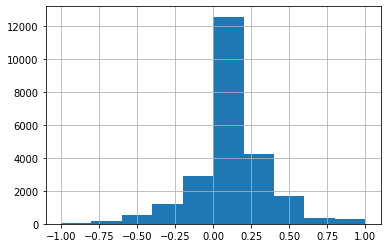

In [43]:
tweets_df_r1['polarity'].hist() 

In [44]:
# create a list of our conditions
conditions = [
    (tweets_df_r1['polarity'] > 0),
    (tweets_df_r1['polarity'] == 0),
    (tweets_df_r1['polarity'] < 0)
    ]

# create a list of the values we want to assign for each condition
values = ['positive', 'neutral', 'negative']

# create a new column and use np.select to assign values to it using our lists as arguments
tweets_df_r1['sentiment1'] = np.select(conditions, values)

# display updated DataFrame
tweets_df_r1.head()

,date,tweet,month,year,tt,sentiment,polarity,subjectivity,sentiment1
0,2021-04-25,We had an issue where twitter seemed to have m...,4,2021,"[We, had, an, issue, where, twitter, seemed, t...","(0.2, 0.24375)",0.200000,0.243750,positive
1,2021-04-25,Can someone nominate the team @VaxHuntersCan f...,4,2021,"[Can, someone, nominate, the, team, @, VaxHunt...","(0.26666666666666666, 0.3083333333333333)",0.266667,0.308333,positive
2,2021-04-25,Sorry for it being late. I had to get a cool l...,4,2021,"[Sorry, for, it, being, late, ., I, had, to, g...","(-0.15937500000000002, 0.6875)",-0.159375,0.687500,negative
3,2021-04-25,Covid vaccines are the results of decades of r...,4,2021,"[Covid, vaccines, are, the, results, of, decad...","(0.21875, 0.34375)",0.218750,0.343750,positive
4,2021-04-25,Got my first vaccine shot and man did it fuck ...,4,2021,"[Got, my, first, vaccine, shot, and, man, did,...","(0.056249999999999994, 0.25833333333333336)",0.056250,0.258333,positive


In [45]:
tweets_df_r1['sentiment1'].value_counts()

positive    12567
neutral      6493
negative     4847
Name: sentiment1, dtype: int64

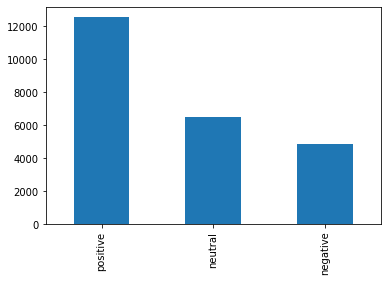

In [46]:
tweets_df_r1['sentiment1'].value_counts().plot.bar() 

In [49]:
tweets_df_r3 = pd.DataFrame(np.random.rand(10, 3), columns=["month", "year", "sentiment1"])

In [50]:
subset = ['sentiment1', 'month','year']
tweets_df_r3 = tweets_df_r1.loc[:, subset] 
tweets_df_r3.head(2) 

,sentiment1,month,year
0,positive,4,2021
1,positive,4,2021


In [51]:
tweets_df_r3.groupby(['month','year','sentiment1']).size().unstack(fill_value=0)

sentiment1  negative  neutral  positive
month year                             
1     2020        11       13        18
      2021       695      812      1628
2     2020        22       27        60
      2021       475      620      1275
3     2020       124      141       314
      2021       795     1091      2045
4     2020       138      140       322
      2021       994     1371      2378
5     2020       105      105       293
6     2020        73       71       136
7     2020       101      138       301
8     2020        85      130       217
9     2020       130      172       317
10    2020        85      128       243
11    2020       293      414      1080
12    2020       721     1120      1940

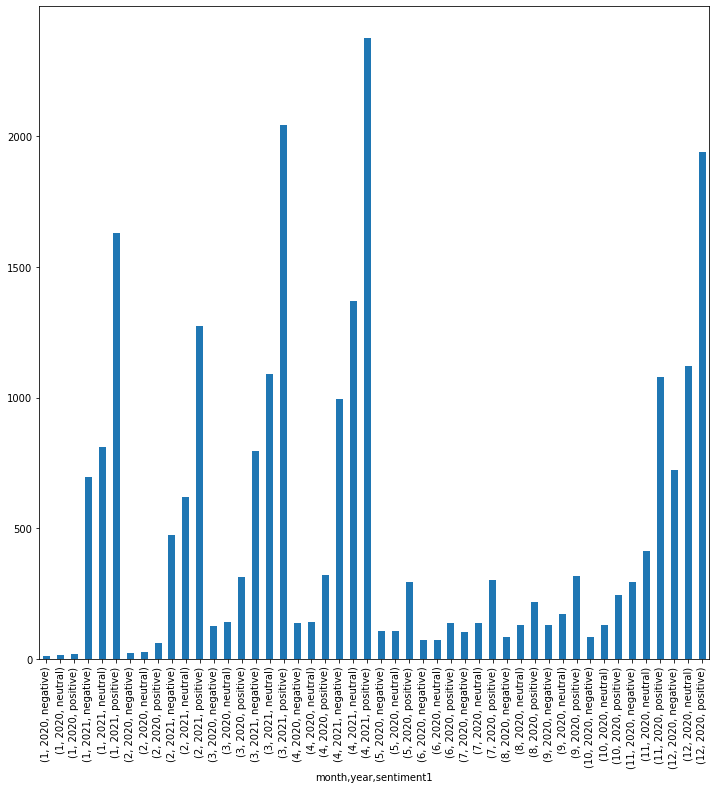

In [52]:
tweets_df_r3.groupby(['month','year','sentiment1']).size().plot.bar(stacked=True ,figsize=(12, 12)); 

#### Spliting into training and testing data sets

In [53]:
train_tweets = tweets_df_r1.sample(frac = 0.75)

In [54]:
test_tweets = tweets_df_r1.drop(train_tweets.index) 

In [55]:
train_tweets.shape

(17930, 9)

In [56]:
test_tweets.shape 

(5977, 9)

In [57]:
train_tweets.to_csv('train_data.csv',index=False)  

In [58]:
test_tweets.to_csv('test_data.csv',index=False)   

#### Stop words and Corpus

In [59]:
stopwords = nltk.corpus.stopwords.words('english')
new_words=('&amp;','http','https','co',"''", '""', '...', '``','@','#',"'",
           '\x89ûï','sxsw\x89û\x9d',"'d","'s","'ll",'//bit.ly/ieavob','&',')','(','“','-','”','*','$',
           "'re","n't",'http','//bit.ly/gvlrin','//j.mp/grn7pk','.',',',':','’','!','?',';','amp','%')
for i in new_words:
    stopwords.append(i)
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [60]:
# stop=set(stopwords.words('english'))

corpus=[]
newtt= train_tweets['tweet'].str.split()
newtt=newtt.values.tolist()
corpus=[word for i in newtt for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in stopwords:
        dic[word]+=1

#### Plotting the top 10 stopwords & non stopwords

In [61]:
def plot_top_stopwords_barchart(tweet):
    stopwords = nltk.corpus.stopwords.words('english')    
    new_words=('&amp;','http','https','co',"''", '""', '...', '``','@','#',"'",
           '\x89ûï','sxsw\x89û\x9d',"'d","'s","'ll",'//bit.ly/ieavob','&',')','(','“','-','”','*','$',
           "'re","n't",'http','//bit.ly/gvlrin','//j.mp/grn7pk','.',',',':','’','!','?',';','amp','%')
    for i in new_words:
        stopwords.append(i)
   
    newtt= train_tweets['tweet'].str.split()
    newtt=newtt.values.tolist()
    corpus=[word for i in newtt for word in i]
    from collections import defaultdict
    dic=defaultdict(int)
    for word in corpus:
        if word in stopwords:
            dic[word]+=1
            
    top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
    x,y=zip(*top)
    plt.bar(x,y)

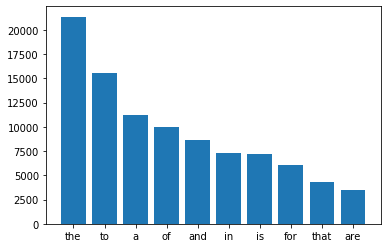

In [62]:
plot_top_stopwords_barchart(train_tweets['tweet']) 

#### Word level Analysis on through counter function
- A Counter is a container that keeps track of how many times equivalent values are added. It can be used to implement the same algorithms for which bag or multiset data structures are commonly used in other languages.

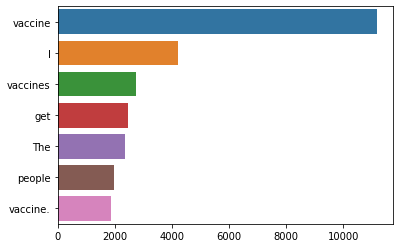

In [63]:
from collections import  Counter
counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:40]:
    if (word not in stopwords):
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

In [64]:
from collections import  Counter

def plot_top_non_stopwords_barchart(tweet):
    stopwords = nltk.corpus.stopwords.words('english')    
    new_words=('&amp;','http','https','co',"''", '""', '...', '``','@','#',"'",
           '\x89ûï','sxsw\x89û\x9d',"'d","'s","'ll",'//bit.ly/ieavob','&',')','(','“','-','”','*','$',
           "'re","n't",'http','//bit.ly/gvlrin','//j.mp/grn7pk','.',',',':','’','!','?',';','amp','%')
    for i in new_words:
        stopwords.append(i)
    
    newtt= train_tweets['tweet'].str.split()
    newtt=newtt.values.tolist()
    corpus=[word for i in newtt for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:40]:
        if (word not in stopwords):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)

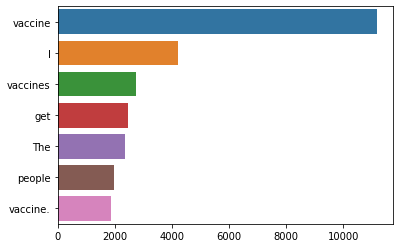

In [65]:
plot_top_non_stopwords_barchart(train_tweets['tweet'])

### Ngram exploration

In [66]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

In [67]:
def plot_top_ngrams_barchart(tweet, n=2):
    stopwords = nltk.corpus.stopwords.words('english')   
    new_words=('&amp;','http','https','co',"''", '""', '...', '``','@','#',"'",
           '\x89ûï','sxsw\x89û\x9d',"'d","'s","'ll",'//bit.ly/ieavob','&',')','(','“','-','”','*','$',
           "'re","n't",'http','//bit.ly/gvlrin','//j.mp/grn7pk','.',',',':','’','!','?',';','amp','%')
    for i in new_words:
        stopwords.append(i)
        
    newtt= train_tweets['tweet'].str.split()
    newtt=newtt.values.tolist()
    corpus=[word for i in newtt for word in i]


    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]
    for word,count in most[:40]:
        if (word not in stopwords):
            x.append(word)
            y.append(count)
        top_n_bigrams=_get_top_ngram(tweet,n)[:10]
        x,y=map(list,zip(*top_n_bigrams))
        sns.barplot(x=y,y=x)

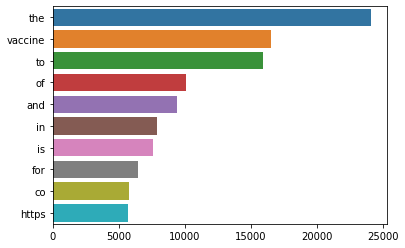

In [68]:
plot_top_ngrams_barchart(train_tweets['tweet'],1)

#### Top N Bigram

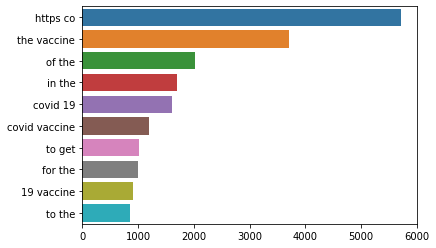

In [69]:
plot_top_ngrams_barchart(train_tweets['tweet'],2)

#### Top N Trigram

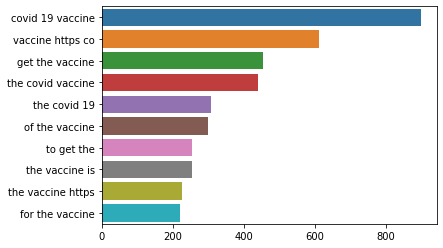

In [70]:
plot_top_ngrams_barchart(train_tweets['tweet'],3) 

#### Top N Quadgram

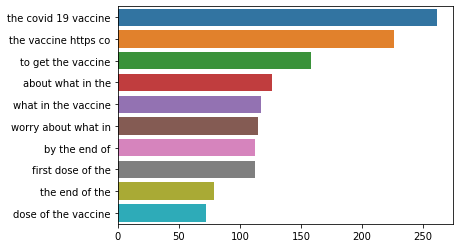

In [71]:
plot_top_ngrams_barchart(train_tweets['tweet'],4)  

In [72]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

def preprocess_tweet(train_tweets):
    corpus=[]
    stem=PorterStemmer()
    lem=WordNetLemmatizer()
    for tweet in train_tweets['tweet']:
        words=[w for w in word_tokenize(tweet) if (w not in stopwords)]
        
        words=[lem.lemmatize(w) for w in words if len(w)>2]
        
        corpus.append(words)
    return corpus

corpus=preprocess_tweet(train_tweets) 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#### Bag Of Words using genism & the LDA model: Latent Dirichlet Allocation (LDA)

In [73]:
import gensim
from gensim import corpora
from gensim.utils import simple_preprocess

dic=gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(doc) for doc in corpus]

In [74]:
lda_model = gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 4, 
                                   id2word = dic,                                    
                                   passes = 10,
                                   workers = 2)
lda_model.show_topics()

[(0,
  '0.060*"vaccine" + 0.013*"get" + 0.012*"people" + 0.007*"The" + 0.006*"Trump" + 0.005*"need" + 0.005*"one" + 0.005*"want" + 0.005*"take" + 0.005*"like"'),
 (1,
  '0.027*"vaccine" + 0.010*"Vaccine" + 0.005*"India" + 0.002*"passport" + 0.002*"free" + 0.002*"le" + 0.002*"For" + 0.002*"Vaccines" + 0.002*"get" + 0.002*"COVID19"'),
 (2,
  '0.057*"vaccine" + 0.010*"The" + 0.009*"million" + 0.008*"Pfizer" + 0.006*"dos" + 0.006*"day" + 0.006*"first" + 0.005*"today" + 0.005*"week" + 0.004*"shot"'),
 (3,
  '0.042*"vaccine" + 0.007*"India" + 0.005*"VACCINE" + 0.004*"first" + 0.004*"The" + 0.004*"Covid" + 0.004*"get" + 0.004*"effect" + 0.004*"THE" + 0.003*"dos"')]

In [75]:
from pyLDAvis import gensim_models

#### Python LDA visualization through pyLDAvis

In [76]:
import pyLDAvis
import pyLDAvis.sklearn
from gensim.corpora import Dictionary
from gensim.models.coherencemodel import CoherenceModel
from gensim.models.ldamodel import LdaModel
pyLDAvis.enable_notebook() 
vis = gensim_models.prepare(lda_model, bow_corpus, dic)
vis

C:\Users\DELL\anaconda3\envs\learn-env\lib\site-packages\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))
C:\Users\DELL\anaconda3\envs\learn-env\lib\site-packages\joblib\numpy_pickle.py:104: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  pickler.file_handle.write(chunk.tostring('C'))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.120048  0.069937       1        1  46.156703
2      0.109991  0.001081       2        1  31.706215
3     -0.036223 -0.141371       3        1  13.240231
1     -0.193816  0.070353       4        1   8.896851, topic_info=         Term          Freq         Total Category  logprob  loglift
14    vaccine  16952.000000  16952.000000  Default  30.0000  30.0000
134   Vaccine    907.000000    907.000000  Default  29.0000  29.0000
4      Pfizer    905.000000    905.000000  Default  28.0000  28.0000
239     India    555.000000    555.000000  Default  27.0000  27.0000
93    million    992.000000    992.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
22     people     45.850773   2177.640700   Topic4  -6.4216  -1.4411
1860      How     31.769613    209.999772   Topic4  -6.7885   0.5309
472      work     34.855074    622.947757   Topic4  -6.6958  -0.4638
577   country     33.995095    702.902736   Topic4  -6.7208  -0.6095
849     COVID     31.873895   1055.678799   Topic4  -6.7852  -1.0807

[330 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
81        1  0.084862        100
81        2  0.790097        100
81        3  0.117051        100
81        4  0.005853        100
1675      2  0.968555       94.5
...     ...       ...        ...
2217      4  0.994682        में
765       4  0.943641        लिए
767       4  0.956660    वैक्सीन
1291      4  0.946881        हैं
1274      4  0.959675  新型コロナワクチン

[608 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 4, 2])

#### Wordcloud

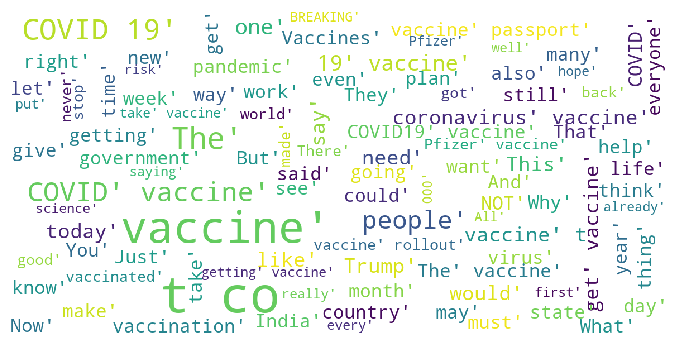

In [77]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(tweet):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)
   
    wordcloud=wordcloud.generate(str(tweet))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(corpus)

In [78]:
train_tweets.head()

,date,tweet,month,year,tt,sentiment,polarity,subjectivity,sentiment1
11213,2021-01-30,UNITED STATES: Member of Johnson &amp; Johnson...,1,2021,"[UNITED, STATES, :, Member, of, Johnson, &, am...","(0.0, 0.5625)",0.000000,0.562500,neutral
13676,2021-01-05,Shouldn’t President Trump be on the phone tryi...,1,2021,"[Shouldn, ’, t, President, Trump, be, on, the,...","(0.0, 0.0)",0.000000,0.000000,neutral
8031,2021-03-05,Guys I’m totally freaked out....I took the COV...,3,2021,"[Guys, I, ’, m, totally, freaked, out, ...., I...","(-0.25, 0.875)",-0.250000,0.875000,negative
24,2021-04-25,I actually wore pants today for the first time...,4,2021,"[I, actually, wore, pants, today, for, the, fi...","(0.125, 0.21666666666666667)",0.125000,0.216667,positive
8557,2021-03-01,Black and brown people have been hardest hit b...,3,2021,"[Black, and, brown, people, have, been, hardes...","(0.2222222222222222, 0.5518518518518518)",0.222222,0.551852,positive


In [79]:
subset = ['tweet','sentiment1']
train_tweets2 = train_tweets.loc[:, subset] 
train_tweets2.head() 

,tweet,sentiment1
11213,UNITED STATES: Member of Johnson &amp; Johnson...,neutral
13676,Shouldn’t President Trump be on the phone tryi...,neutral
8031,Guys I’m totally freaked out....I took the COV...,negative
24,I actually wore pants today for the first time...,positive
8557,Black and brown people have been hardest hit b...,positive


In [80]:
train_tweets2.sentiment1.value_counts()

positive    9481
neutral     4853
negative    3596
Name: sentiment1, dtype: int64

#### Converting target variable into numbers

In [81]:
train_tweets2.replace({'negative': 0, 'positive': 1, 'neutral':2}, inplace = True)

In [82]:
train_tweets2.head(10)

,tweet,sentiment1
11213,UNITED STATES: Member of Johnson &amp; Johnson...,2
13676,Shouldn’t President Trump be on the phone tryi...,2
8031,Guys I’m totally freaked out....I took the COV...,0
24,I actually wore pants today for the first time...,1
8557,Black and brown people have been hardest hit b...,1
17919,Curious: are you going to take the vaccine? ...,0
21954,The President of the United States believes th...,0
6477,President Biden is set to meet his goal of del...,1
14570,Vice President-elect Kamala Harris and husband...,2
15310,"All these photographs of mask-denying, Trump-t...",2


In [83]:
train_tweets2.sentiment1.value_counts() 

1    9481
2    4853
0    3596
Name: sentiment1, dtype: int64

In [84]:
data = train_tweets2.tweet
target = train_tweets2.sentiment1

In [85]:
stopwords = nltk.corpus.stopwords.words('english')
new_words=('&amp;','http','https','co',"''", '""', '...', '``','@','#',"'",
           '\x89ûï','sxsw\x89û\x9d',"'d","'s","'ll",'//bit.ly/ieavob','&',')','(','“','-','”','*','$',
           "'re","n't",'http','//bit.ly/gvlrin','//j.mp/grn7pk','.',',',':','’','!','?',';','amp','%')
for i in new_words:
    stopwords.append(i)
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

#### removing the stopwords and tokenizing 

In [86]:
## tokenize tweets and remove stopwords
def process_tweet(tweet):
    tokens = nltk.word_tokenize(tweet)
    stopwords_removed = [token.lower() for token in tokens if token.lower() not in stopwords]
    return stopwords_removed

In [87]:
processed_tweet = list(map(process_tweet,data)) 

In [88]:
processed_tweet 

[['united',
  'states',
  'member',
  'johnson',
  'johnson',
  'board',
  'says',
  'pfizer',
  'moderna',
  'company',
  'enough',
  'coronavirus',
  'vaccines',
  'entire',
  'us',
  'population',
  'june'],
 ['president',
  'trump',
  'phone',
  'trying',
  'get',
  'vaccines',
  'people',
  'arms',
  'rather',
  'trying',
  'strong-arm',
  'georgia',
  'overturning',
  'people'],
 ['guys',
  'totally',
  'freaked',
  '....',
  'took',
  'covid19',
  'vaccine',
  'band',
  'aid',
  'arm',
  'wtf',
  '//t.co/srtreqgm6u'],
 ['actually',
  'wore',
  'pants',
  'today',
  'first',
  'time',
  'months',
  'get',
  'vaccine',
  'attempt',
  '2'],
 ['black',
  'brown',
  'people',
  'hardest',
  'hit',
  'pandemic',
  'yet',
  'govparsonmo',
  'refusing',
  'provide',
  'adequate',
  'vaccine',
  'access',
  'communities',
  'requested',
  'mo',
  'vaccine',
  'equity',
  'plan',
  'weeks',
  'ago',
  'make',
  'sure',
  'happen',
  'still',
  'waiting',
  'need',
  'answers'],
 ['curious

In [89]:
tweet_concat = []
for tweet in processed_tweet:
    tweet_concat += tweet 

In [90]:
tweet_freqdist = FreqDist(tweet_concat)
tweet_freqdist.most_common(260) 

[('vaccine', 16242),
 ('vaccines', 4248),
 ('covid', 2688),
 ('get', 2662),
 ('people', 2505),
 ('covid-19', 1564),
 ('first', 1520),
 ('trump', 1377),
 ('us', 1314),
 ('one', 1262),
 ('coronavirus', 1171),
 ('today', 1100),
 ('pfizer', 1062),
 ('got', 1002),
 ('like', 975),
 ('take', 967),
 ('would', 956),
 ('doses', 932),
 ('million', 930),
 ('getting', 904),
 ('new', 893),
 ('need', 886),
 ('biden', 826),
 ('covid19', 804),
 ('vaccinated', 786),
 ('virus', 758),
 ('india', 751),
 ('health', 719),
 ('government', 709),
 ('dose', 691),
 ('time', 686),
 ('know', 679),
 ('year', 676),
 ('news', 674),
 ('want', 672),
 ('make', 665),
 ('going', 660),
 ('president', 651),
 ('says', 640),
 ('effective', 633),
 ('world', 631),
 ('pandemic', 619),
 ('day', 610),
 ('still', 602),
 ('said', 589),
 ('safe', 584),
 ('1', 581),
 ('even', 573),
 ('everyone', 570),
 ('work', 567),
 ('every', 558),
 ('uk', 538),
 ('johnson', 526),
 ('go', 520),
 ('let', 508),
 ('many', 507),
 ('free', 504),
 ('could'

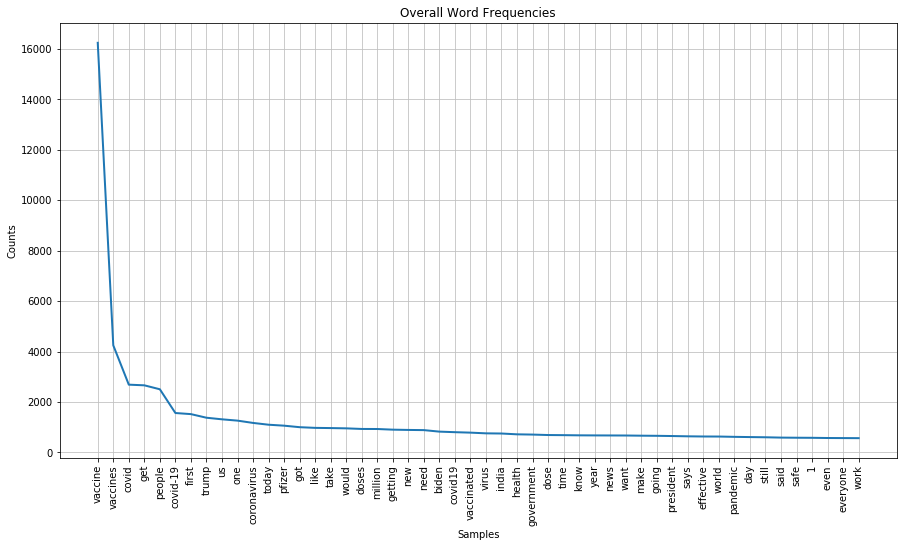

In [91]:
plt.figure(figsize=(15,8))
plt.title('Overall Word Frequencies')
tweet_freqdist.plot(50)